# Neural Networks - Syllabus

- Introduction

    - Historical overview of the evolution of computer vision and artificial neural networks
    - Motivating examples, applications of neural networks in image recognition, object detection and localization, speech detection, etc.

- Technical details, overview of the necessary python modules and their installation, computational considerations:
     - numpy
     - pandas
     - scikit-learn
     - keras
     - tensorflow / tensorflow-gpu / tensorboard

- Mathematical formulation and implementation

    - Simple implementation of a shallow neural network from scratch
    - Loss functions
    - Gradient-based optimization: batch, mini batch and stochastic gradient descent methods
    - Regularization techniques: L1, L2, elastic net, dropout

- Basic examples in scikit-learn

    - Review of the logistic regression and the multilayer perceptron (shallow neural networks)
    - Experiments on a simple multi-class classification problem: handwritten digit classification on the MNIST dataset
    - The importance of the choice of hyperparamaters, such as:
        - learning rate
        - number of hidden layers
        - number of neurons in the layers
        - activation function
        - optimization method

- Convolutional neural networks (CNNs)

    - Convolutional layers
    - Pooling layers
    - Fully connected layers
    - Experiments with different CNN architectures in Keras using the Sequential API, best practices
    - Avoiding overfitting with regularizations, dropout layers
    - Speeding up the learning with batch normalization layers
    - Keras callbacks, checkpoints
    - Model saving, loading in Keras, visualizing models (using Graphviz)

- Best solutions

    - GoogLeNet (winner of ImageNet Large Scale Visual Recognition Challenge in 2014) with the inception module and current versions
    - VGG (2nd of ILSVRC in 2014)
    - ResNet (winner of ILSVRC in 2015) with residual networks
    - Creating more complex architectures using the Keras Functional API
    - Transfer learning, fine-tuning existing pre-trained models for new problems

- Visualization of the 'black box'

    - Visualization using t-SNE embeddings
    - Visualization of the activations, filters

- Recurrent/Recursive neural networks (RNNs)

    - Examples for sequential data, time series
    - Gated recurrent units (GRUs)
    - Long short-term memory (LSTM) networks

- Generative Adversarial Networks (GANs)
    - Basic implementation of a GAN in Keras
    
- Literature:
    - F. Chollet: Deep Learning with Python, Manning Publications, ISBN: 1617294438, 9781617294433
    - M. Nielsen: Neural Networks and Deep Learning, http://neuralnetworksanddeeplearning.com/

    

## Historical overview of shallow and deep neural networks

- First mathematical models of a neural network: 1940-1950s
- Single-layer perceptron (1958, Rosenblatt)  
- Backpropagation - efficient gradient calculation method (1970s)
- Multilayer perceptron (1980s)
- Recurrent neural networks for sequential data (1986)
- LeNet, simple convolutional neural networks (1990, LeCun) 
- MNIST dataset - standard benchmark for handwritten digit recognization (1998)
- Long short-term memory (LSTM) networks in RNNs (1997)
- Rectified Linear Units, ReLU activation to avoid the vanishing gradient problem (2011)
- Dropout layers (2012)
- Generative Adversarial Networks, GANs (2014)
- ImageNet challenge, currently with over 14 million labelled images (2015-)
- Batch normalization (2015)
- Residual networks, ResNet (2015)
- Inception modules, capsule networks (2017-)
- Object detection, localization, YOLO networks (2018-)

## Top achievements related to neural networks - AlphaGo and AlphaZero 

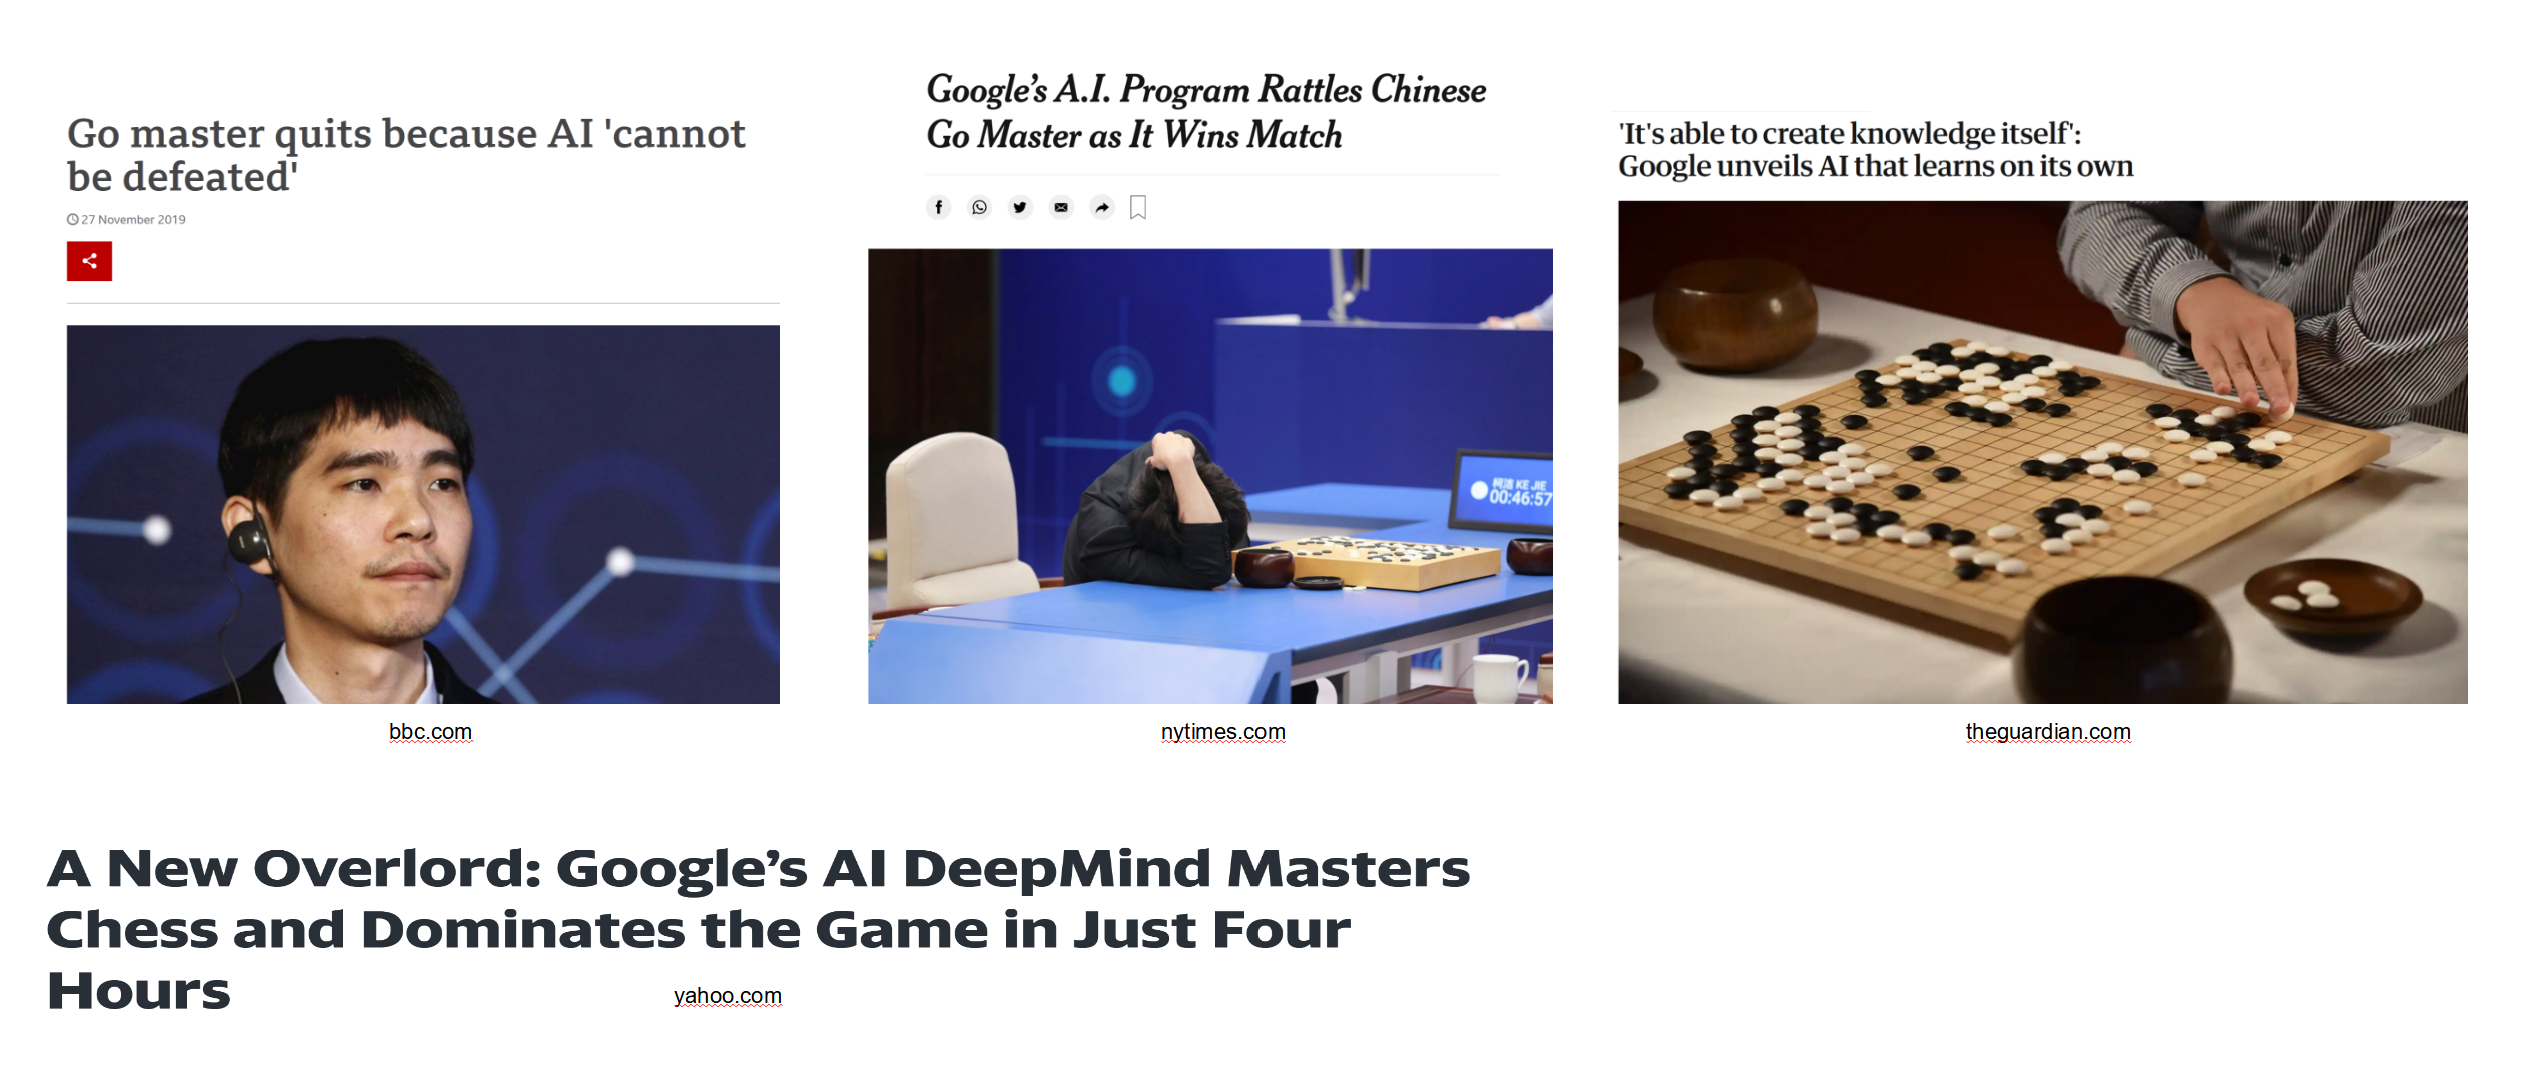

In [1]:
from IPython.display import Image
Image(filename='alphazero.png') 

- Oct 2015 – AlphaGo (Fan) beats Fan Hui (European Go champion)
- March 2016 – AlphaGo (Lee) beats Lee Sedol (9th dan professional)
- May 2017 – AlphaGo (Master) beats Ke Jie (the current #1 player in the world)
- October 2017 – AlphaGo Zero beats AlphaGo by winning 100:0
- December 2017 – AlphaZero surpasses the top engines in 3 different games
    - AlphaZero beats AlphaGo Zero (3-day): 61% win rate
    - AlphaZero beats Stockfish in chess: 155 W, 839 D, 6 L
    - AlphaZero beats Elmo in shogi: 91.2% win rate

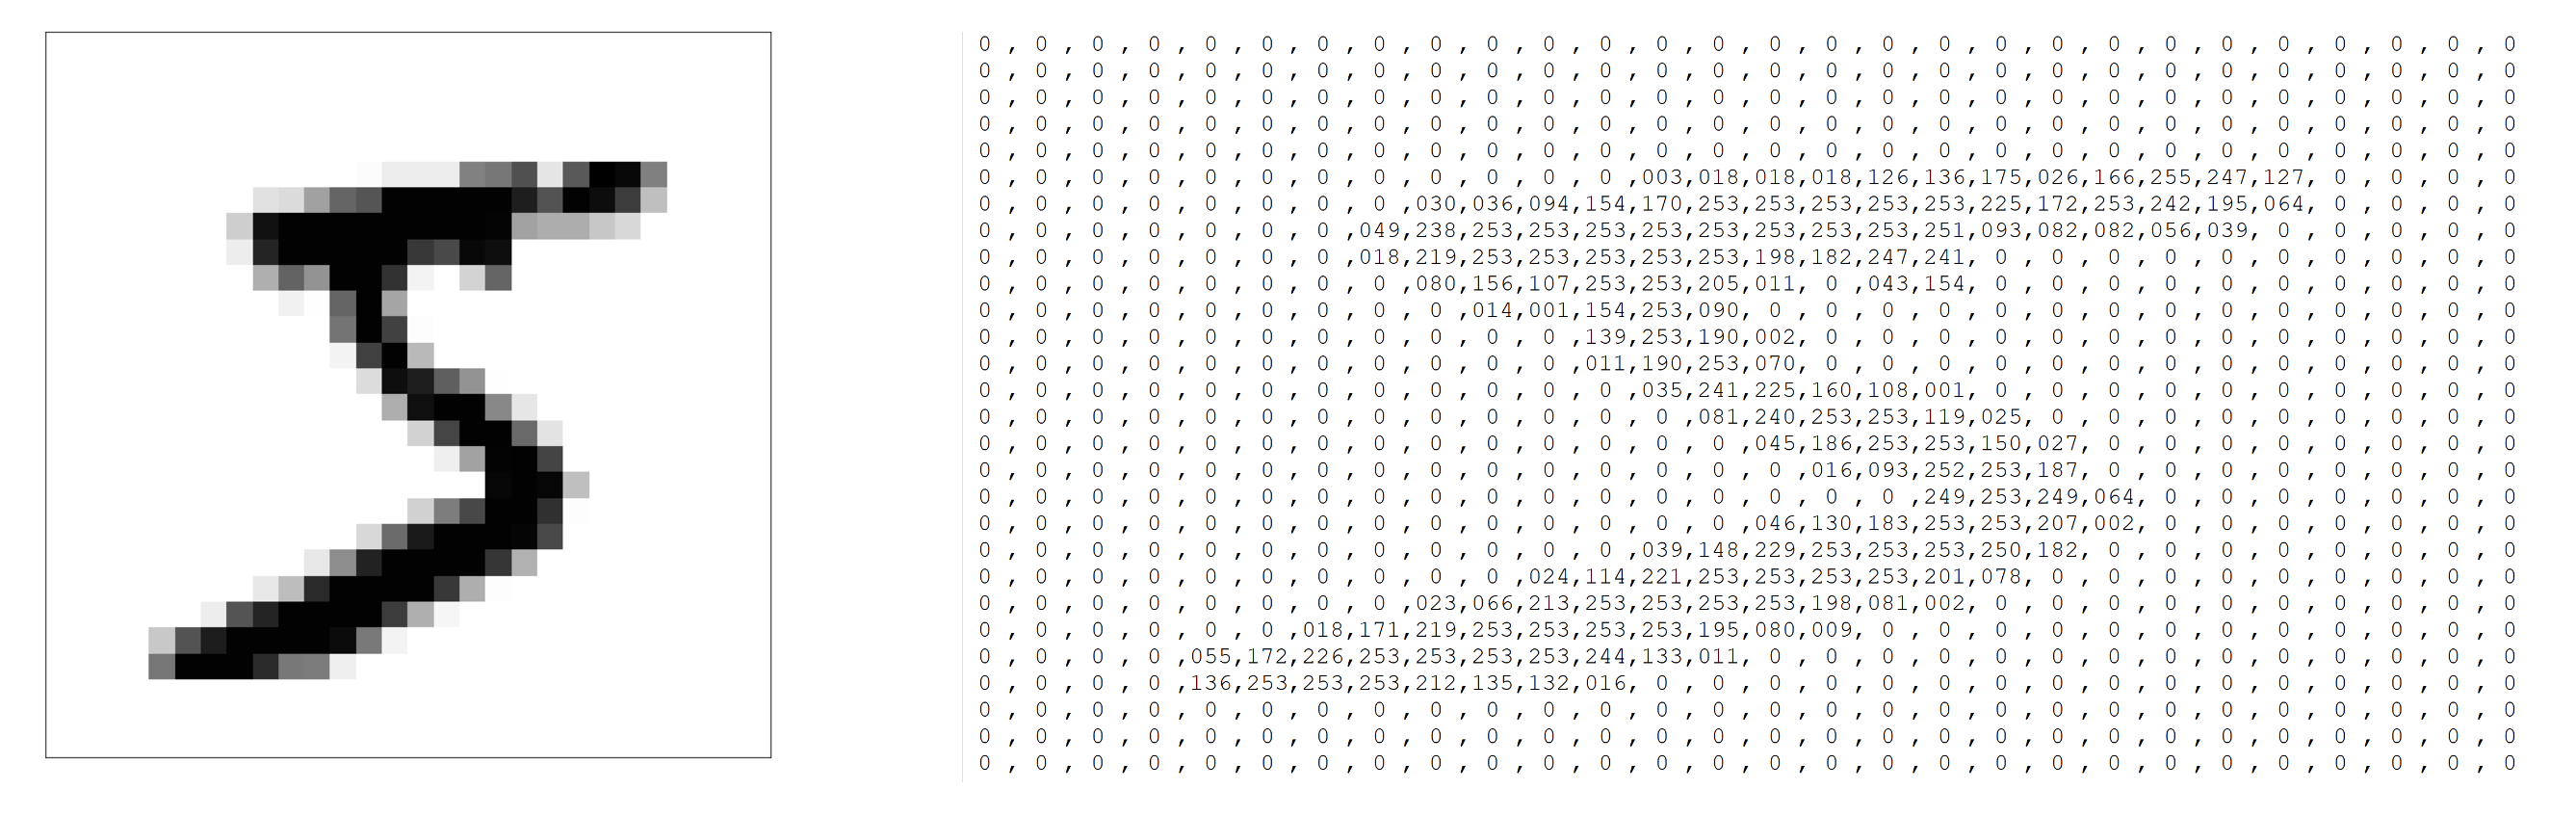

In [2]:
Image(filename='mnist.png') 

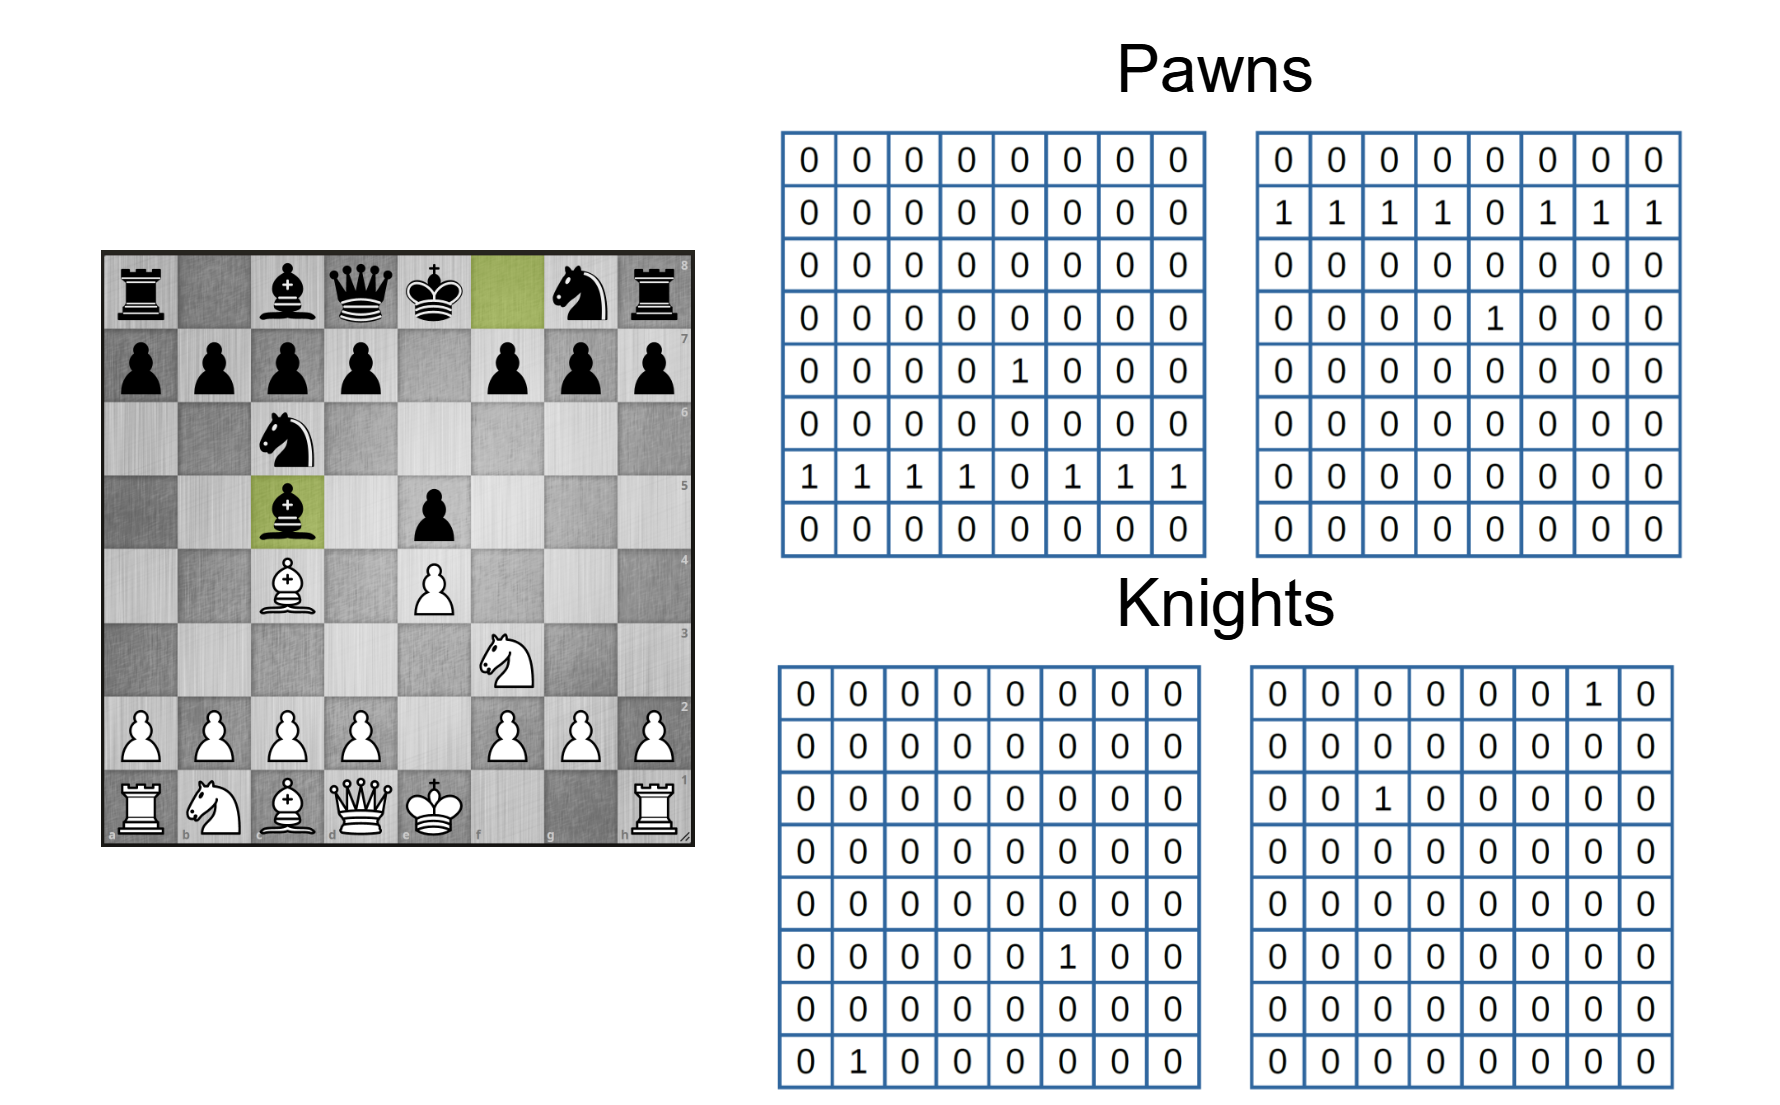

In [3]:
Image(filename='planes.png') 

### The building blocks behind AlphaGo and AlphaZero's neural networks are:

- Residual blocks inspired by ResNet
- Batch normalized convolutional layers
- ReLU layers

## Deep learning and neural networks are used in the state-of-the-art solutions for:

- Speech recognition (Sequential data - RNNs)
- Natural Language Processing (NLP), text classification, etc. (CNNs and RNNs)
- Deep Reinforcement Learning (AlphaGo, AlphaZero, AlphaStar, etc.)


# Technical details for the course:

Required Python packages: 
   - `numpy` - for efficient linear algebra, to perform mathematical operations on arrays/matrices
   - `pandas` - for an open source data analysis and manipulation tool
   - `matplotlib` - for visualizations
   - `scikit-learn` - for experimenting with basic Machine Learning models
   - `tensorflow` / `tensorflow-gpu` - an open source platform, efficient neural network implementations (Note: PyTorch would be a viable alternative in certain applications)
   - `tensorboard` - the TensorFlow visualization toolkit
   - `keras` - high-level API running on TensorFlow 
   - Jupyter notebooks for interactive experiments
   - and lots of other auxiliary packages later...
   
TensorFlow has an efficient GPU support (`tensorflow-gpu` package) that has some hardware requirements, such as CUDA-enabled GPU cards (https://developer.nvidia.com/cuda-gpus). For software requirements and installation, see https://www.tensorflow.org/install/gpu and https://www.tensorflow.org/install/gpu#software_requirements

## Logistic Regression with two classes - Review

- input features: $x_1$, $x_2$, ..., $x_n$ and an extra constant $1$ (bias)
- output feature: $y$ - a probability prediction for being in Class 1 (being `positive` in case of a disease)
- weights are calculated in the training phase to minimize a loss function, weights $w_1, w_2, ... w_n$ and a weight associated with the bias $w_0$ (intercept)

- first we calculate the linear combination

$$w^T x + b=  w_1 x_1 + w_2 x_2 + ... + w_n x_n + w_0$$

- Then we apply an activation function, typically a sigmoid function


$$y_{pred} = f(w, x) = \sigma\left(w^T x + w_0\right) \hspace{3cm} \sigma(z) = \frac{1}{1 + e^{-z}}$$


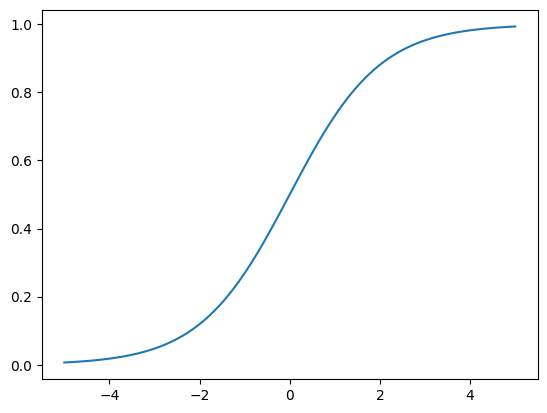

In [13]:
# Plot the sigmoid function for arbitrary w vectors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w = [-5, 0.2]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x_grid = np.linspace(-5, 5, 100)
y_grid = sigmoid(x_grid)

plt.plot(x_grid, y_grid)

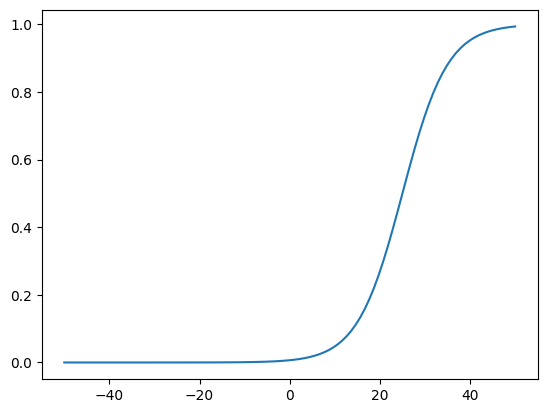

In [16]:
w = [-5, 0.2]

x_grid = np.linspace(-50, 50, 100)

plt.plot(x_grid, sigmoid(w[1] * x_grid + w[0]))

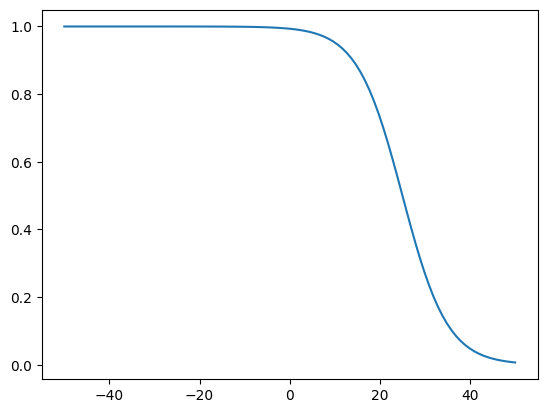

In [18]:
w = [5, -0.2]

x_grid = np.linspace(-50, 50, 100)

plt.plot(x_grid, sigmoid(w[1] * x_grid + w[0]))

### Cross entropy - loss function for binary classification

- $y_{true}$: binary (0-1) vector of the true categories 
- $y_{pred}$: vector of the predictions with probabilities, $0\leq y_{pred} \leq 1$

$$LOSS = -\frac{1}{n}\sum\limits   y_{true} \log(y_{pred}) + (1 - y_{true})\log(1 - y_{pred})$$

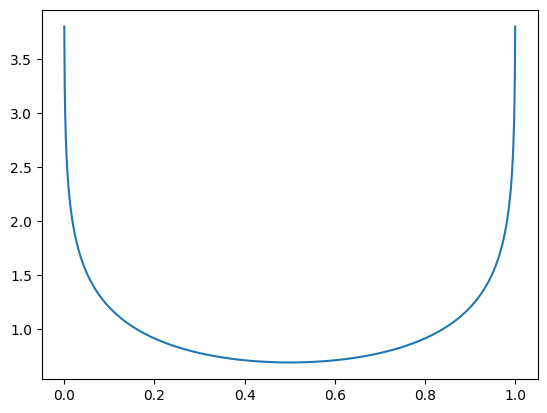

In [22]:
# create a loss function and plot it
def loss(ytrue, ypred):
    return -(ytrue * np.log(ypred) + (1 - ytrue) * np.log(1 - ypred))

ytrue = 0.5
ypred = np.linspace(0, 1, 2000)[1:-1]

plt.plot(ypred, loss(ytrue, ypred))

### Basic experiments on a classical real-life dataset

In [23]:
import pandas as pd

names = ["Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape",
         "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin",
         "Normal_Nucleoli", "Mitoses", "Class"]

#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#                  names=names,
#                  na_values="?")

df = pd.read_csv("breast-cancer-wisconsin.data",
                  names=names,
                  na_values="?")

df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [32]:
med = df["Bare_Nuclei"].median()
df["Bare_Nuclei"] = df["Bare_Nuclei"].fillna(med).astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_code_number           699 non-null    int64
 1   Clump_Thickness              699 non-null    int64
 2   Uniformity_of_Cell_Size      699 non-null    int64
 3   Uniformity_of_Cell_Shape     699 non-null    int64
 4   Marginal_Adhesion            699 non-null    int64
 5   Single_Epithelial_Cell_Size  699 non-null    int64
 6   Bare_Nuclei                  699 non-null    int64
 7   Bland_Chromatin              699 non-null    int64
 8   Normal_Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


Fill the N/A data and convert that column to integer values and set the index column

In [35]:
y = df["Class"] // 2 - 1
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

In [37]:
X = df.values[:, 1:-1]
X.shape

(699, 9)

### Just use the first column of X for 1D experiments

In [41]:
list(zip(X[:, 0], y))[:20] 

[(5, 0),
 (5, 0),
 (3, 0),
 (6, 0),
 (4, 0),
 (8, 1),
 (1, 0),
 (2, 0),
 (2, 0),
 (4, 0),
 (1, 0),
 (2, 0),
 (5, 1),
 (1, 0),
 (8, 1),
 (7, 1),
 (4, 0),
 (4, 0),
 (10, 1),
 (6, 0)]

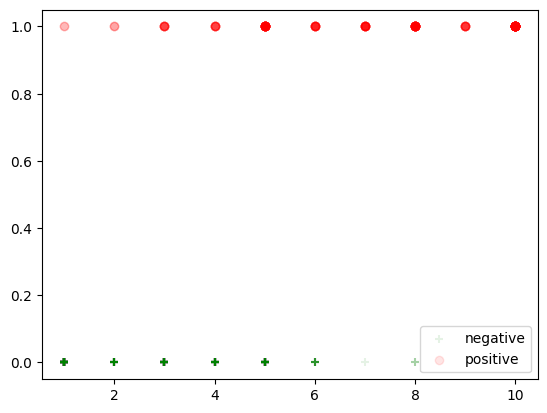

In [48]:
### Visualize the distribution of the values

plt.scatter(X[y==0, 0], y[y==0], color="green", marker="+", label="negative", alpha=0.1)
plt.scatter(X[y==1, 0], y[y==1], color="red", marker="o", label="positive", alpha=0.1)
plt.legend()

### Get a better picture

### Model training with 3-fold cross-validation

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

cv = KFold(n_splits=3, shuffle=True, random_state=42)


for train_index, test_index in cv.split(X):
    model = LogisticRegression()
    
    model.fit(X[train_index, 0].reshape(-1, 1), y[train_index])

    y_pred_proba_train = model.predict_proba(X[train_index, 0].reshape(-1, 1))
    y_pred_proba_test = model.predict_proba(X[test_index, 0].reshape(-1, 1))
    
    train_loss = log_loss(y[train_index], y_pred_proba_train)
    test_loss = log_loss(y[test_index], y_pred_proba_test)

    print(train_loss, test_loss)

0.35518890384695323 0.2887050313919231
0.30586039133879395 0.3868546120547818
0.331919886175007 0.33433417773399904


In [65]:
w1, w0 = model.coef_[0, 0], model.intercept_[0]
w1, w0

(0.9384138938755876, -5.052259502708389)

In [9]:
# Look at the coefficients of a model

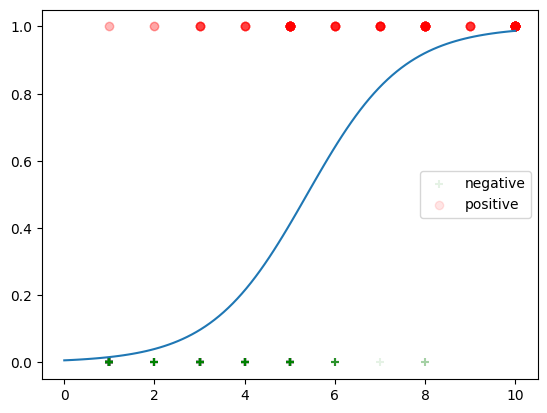

In [67]:
x_grid = np.linspace(0, 10, 100)

plt.plot(x_grid, sigmoid(w1 * x_grid + w0))
plt.scatter(X[y==0, 0], y[y==0], color="green", marker="+", label="negative", alpha=0.1)
plt.scatter(X[y==1, 0], y[y==1], color="red", marker="o", label="positive", alpha=0.1)
plt.legend()

In [70]:
# w0 + w1 * x_mid = 0
x_mid = -w0 / w1
x_mid

5.383828538431896

### Decision boundary in 1D

This simple 1D model 
- predicts Class 0 (`negative`) if the `Clump_Thickness` value is less than ~5.38, 
- predicts Class 1 (`positive`) if the `Clump_Thickness` value is greater than ~5.38

### Experiments in 2D by using the first two columns of X

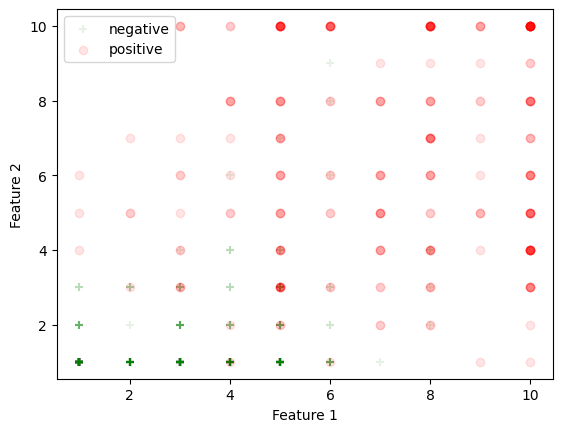

In [75]:
# Visualization

plt.scatter(X[y==0, 0], X[y==0, 1], color="green", marker="+", label="negative", alpha=0.1)

plt.scatter(X[y==1, 0], X[y==1, 1], color="red", marker="o", label="positive", alpha=0.1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

### Model training with 3-fold cross-validation

In [79]:
cv = KFold(n_splits=3, shuffle=True, random_state=58)

for train_index, test_index in cv.split(X):
    model = LogisticRegression()
    
    model.fit(X[train_index, :2], y[train_index])

    y_pred_proba_train = model.predict_proba(X[train_index, :2])
    y_pred_proba_test = model.predict_proba(X[test_index, :2])
    
    train_loss = log_loss(y[train_index], y_pred_proba_train)
    test_loss = log_loss(y[test_index], y_pred_proba_test)

    print(train_loss, test_loss)

0.1509959272859052 0.16064880042975874
0.1417722297942682 0.17679591445420548
0.15863948249197102 0.1389151195166006


### Decision boundary in 2D

$$ ax + by + c = 0 \Longrightarrow  y = -\frac{c}{b} - \frac{a}{b}x$$

In [84]:
(a, b), c = model.coef_[0], model.intercept_[0]
a, b, c

(0.6119448858532737, 1.139507131241366, -6.9481789870021915)

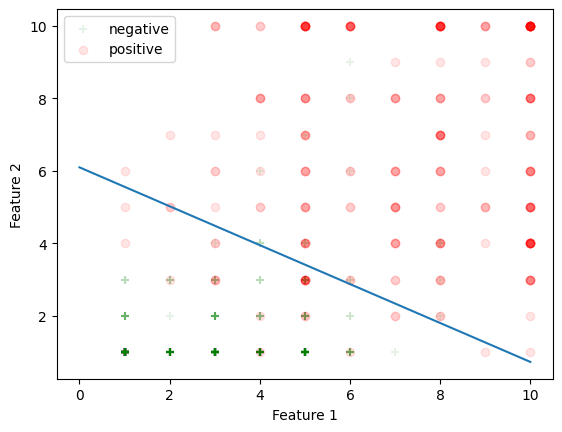

In [86]:
# Visualization

plt.scatter(X[y==0, 0], X[y==0, 1], color="green", marker="+", label="negative", alpha=0.1)

plt.scatter(X[y==1, 0], X[y==1, 1], color="red", marker="o", label="positive", alpha=0.1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x_grid = np.linspace(0, 10, 100)

plt.plot(x_grid, -c / b - a / b * x_grid)
plt.legend()